In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import math
import cv2
from numpy import genfromtxt
import pandas as pd
from PIL import Image

(300, 300, 3)


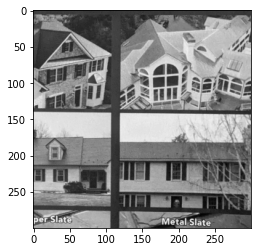

-1

In [2]:
img = cv2.imread('pic1grey300.jpg')
S = img.shape
M = S[0]
N = S[1]
image = img.copy()
A = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(S)
plt.imshow(A,cmap='gray')
plt.show()
cv2.waitKey(0)

In [3]:
def addzeros(img):
    h = img.shape[0]
    w = img.shape[1]
    r1=0
    r2=1
    r3 = h-1
    r4 = h-2
    c1= 0
    c2 = 1
    c3 = w-1
    c4 = w-2
    for i in range(0,w):
        img[r1][i]=0
        img[r2][i]=0
        img[r3][i]=0
        img[r4][i]=0
    for j in range(0,h):
        img[j][c1]=0
        img[j][c2]=0
        img[j][c3]=0
        img[j][c4]=0
    return img

In [4]:
def gaussianKernel(size, sigma, twoDimensional=True):
    if twoDimensional:
        kernel = np.fromfunction(lambda x, y: (1/(2*math.pi*sigma**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma**2)), (size, size))
    else:
        kernel = np.fromfunction(lambda x: math.e ** ((-1*(x-(size-1)/2)**2) / (2*sigma**2)), (size,))
    return kernel / np.sum(kernel)

In [6]:
kernelSize = 9
g = gaussianKernel(kernelSize,2,False)
print(g)
print(sum(g))

[0.02763055 0.06628225 0.12383154 0.18017382 0.20416369 0.18017382
 0.12383154 0.06628225 0.02763055]
0.9999999999999999


In [7]:
def seperableFilter(f,g):
    #h1 = np.zeros((M,N), dtype=np.float64)
    #h2 = np.zeros((M,N), dtype=np.float64)
    h1 = A.copy()
    h2 = A.copy()
    s = kernelSize
    for i in range(M):
        for j in range(4, N-4):
            summ = 0
            for k in range(0,s):
                summ = summ + g[k] * f[i, j-(k-4)]
            h1[i,j] = summ

    for j in range(N):
        for i in range(4, M-4):
            summ = 0
            for k in range(0,9):
                summ = summ + g[k] * h1[i - (k-4) , j]
            h2[i,j] = summ
    return h2

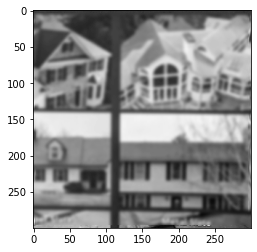

-1

In [8]:
f = np.copy(A)
h2 = seperableFilter(f,g)
plt.imshow(h2,cmap='gray')
plt.show()
cv2.waitKey(0)

In [9]:
def gradientMagnitude(h):
    Gm = np.zeros((M,N), dtype=np.float64)
    Ix = np.zeros((M,N), dtype=np.float64)
    Iy = np.zeros((M,N), dtype=np.float64)
    mask_x = np.zeros((1,2))
    mask_x[0][0] = -1
    mask_x[0][1] = 1
    
    mask_y = np.zeros((2,1))
    mask_y[0][0] = 1
    mask_y[1][0] = -1
    h = np.float64(h)
    Ix = cv2.filter2D(h,-1,mask_x)
    Iy = cv2.filter2D(h,-1,mask_y)
    Gm = (Ix**2 + Iy**2)**0.5
    plt.subplot(121)
    plt.imshow(Gm,cmap='gray')
    plt.title('GM')
    plt.axis('off')
    plt.show()
    plt.subplot(121)
    plt.imshow(Ix,cmap='gray')
    plt.title('X-derivative')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(Iy,cmap='gray')
    plt.title('Y-derivative')
    plt.axis('off')
    plt.show()
    return Gm

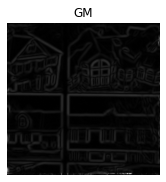

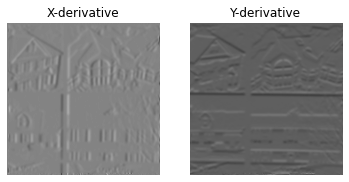

In [10]:
Gm = np.zeros((M,N), dtype=np.float64)
Gm = gradientMagnitude(h2)

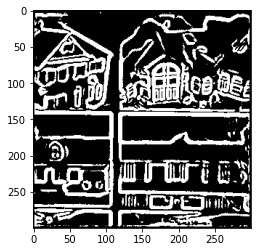

In [11]:
R = 8
edgesimage = np.zeros((300,300), dtype=np.uint8)

for i in range(0,300):
    for j in range(0,300):
        if Gm[i][j]>R:
            edgesimage[i][j]=255
        else:
            edgesimage[i][j]=0

edgesimage = addzeros(edgesimage)
plt.imshow(edgesimage,cmap='gray')
ext='.jpg'
plt.imsave(str('edges'+ ext), edgesimage, cmap='gray')

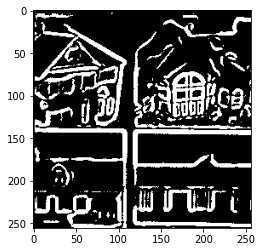

In [12]:
R = 10
edgesimage2 = np.zeros((256,256), dtype=np.uint8)
#for range 2 -255 as given in specifications
for i in range(2,256):
    for j in range(2,256):
        if Gm[i][j]>R:
            edgesimage2[i][j]=255
        else:
            edgesimage2[i][j]=0

#edgesimage = addzeros(edgesimage)
plt.imshow(edgesimage2,cmap='gray')
ext='.jpg'
plt.imsave(str('edges2'+ ext), edgesimage2, cmap='gray')